# Dataset Information

Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# 1: Import Libraries

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.metrics import confusion_matrix

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


# for path
import os

# 2: Reading the Dataset

In [3]:
dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))

The shape of the dataset is (10834, 18).




# 3- Explainatry Data Analysis - EDA

In [4]:
# Shape or Size
df.shape

(10834, 18)

**The shape of the dataset is (10834, 18) , containing 17 Features beside (Y / Bean Class)**

In [5]:
#Dataset information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


**The features are all numerical but (Y / Bean Class)**
<br>
**No Nullable Data**

<AxesSubplot:xlabel='y', ylabel='count'>

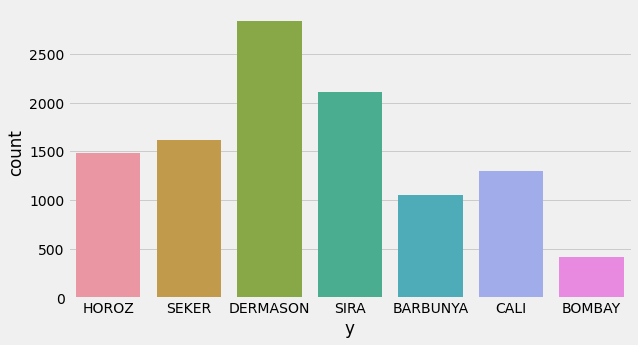

In [6]:
plt.figure(figsize=(9,5))
sns.countplot(x="y", data=df)

**Number of instancs for each class , Dermason has the highest number.**

# Data Visualization
**Heatmap**

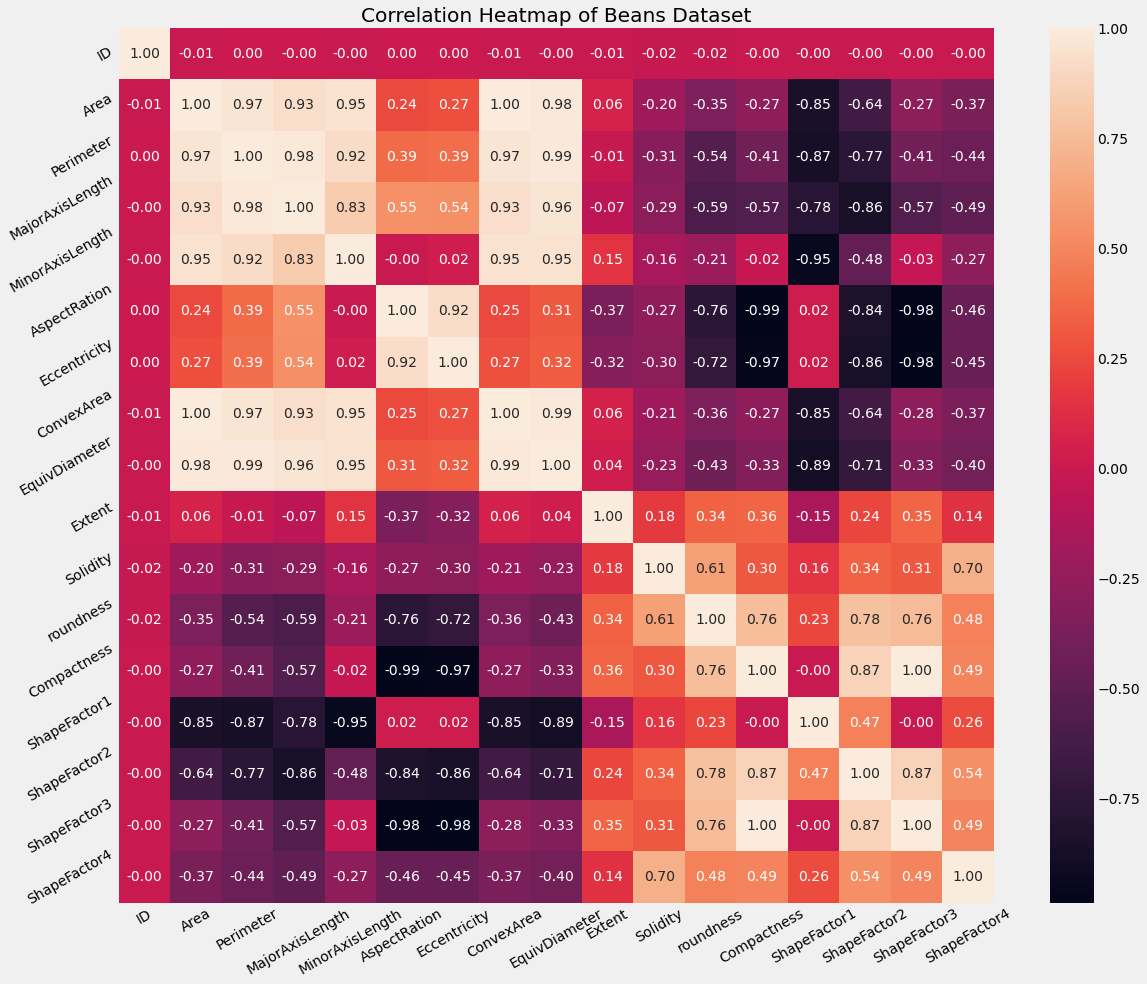

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(18,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

From this correlation matrix we can exctract features that are strongly correlated like : 
- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

Features to be drobbed : 

- ShapeFactor3
- Compactness
- AspectRation
- Area
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

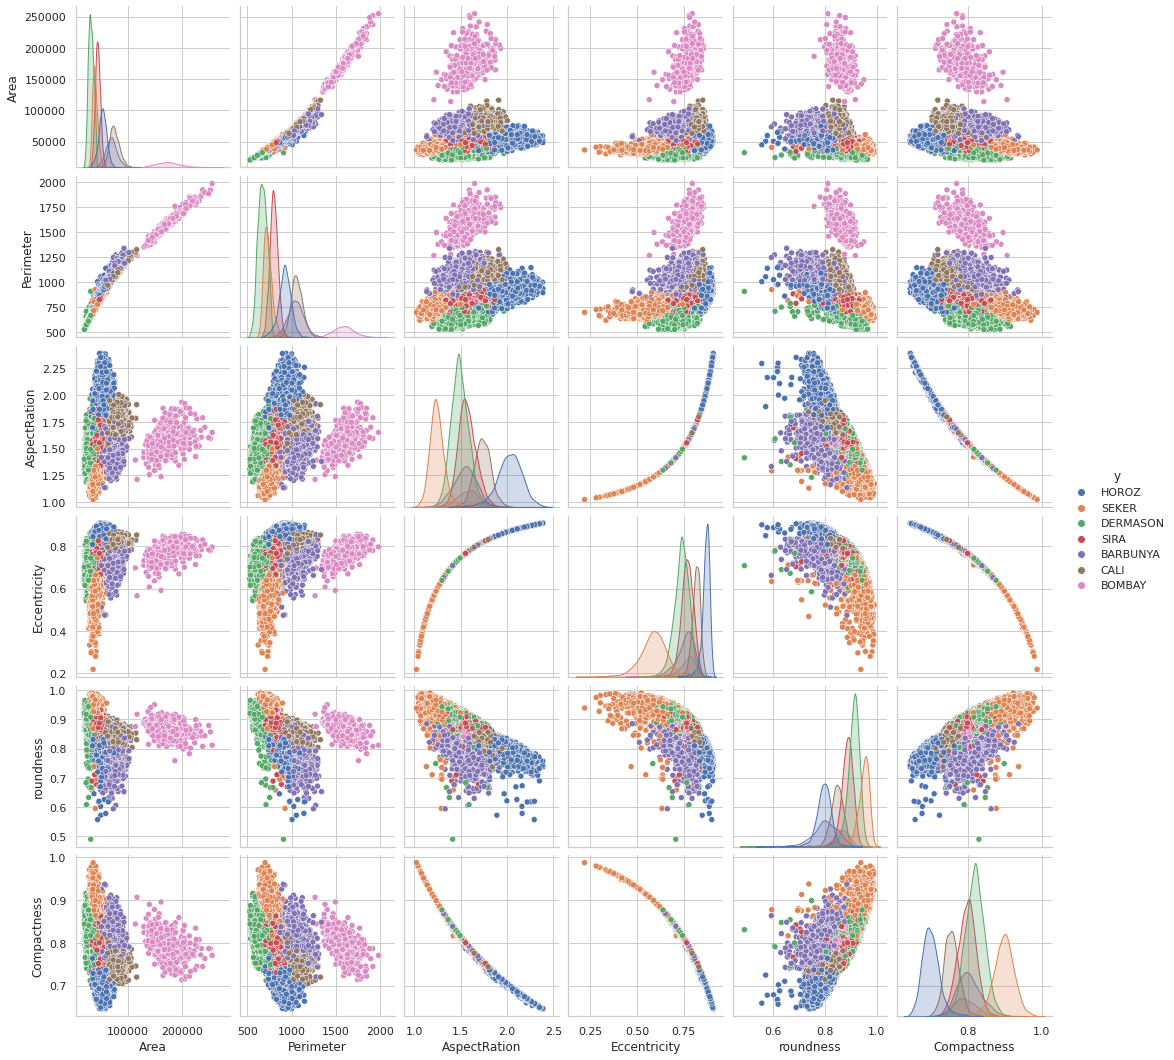

In [8]:
Strongly_corr_features = df[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","y"]]
features2 = df[["ShapeFactor1","ShapeFactor2","ShapeFactor3","ShapeFactor4","y"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="y")

In [9]:
(df['y'].value_counts()/10834)*100

DERMASON    26.186081
SIRA        19.466494
SEKER       14.962156
HOROZ       13.734539
CALI        12.036182
BARBUNYA     9.756323
BOMBAY       3.858224
Name: y, dtype: float64

In [10]:
weights = {'DERMASON':1.0,'SIRA':1.345,'SEKER':1.750,'HOROZ':1.907,'CALI':2.175,'BARBUNYA':2.684,'BOMBAY':6.787}

**From the graph above, Linear and log relations can be detected.**

**Next step will be Detecting how Beans classes can be effected by many features ..**

<AxesSubplot:xlabel='y', ylabel='Compactness'>

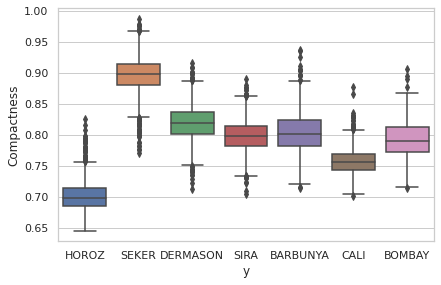

In [11]:
sns.boxplot(x="y", y="Compactness", data=df)

<AxesSubplot:xlabel='y', ylabel='Perimeter'>

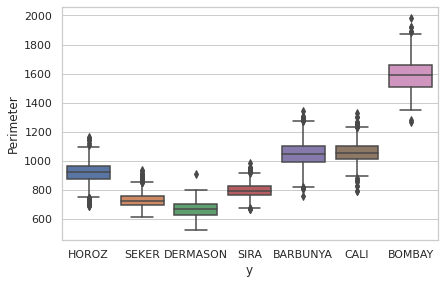

In [12]:
sns.boxplot(x="y", y="Perimeter", data=df)

- A perimeter is  a path that encompasses/surrounds/outlines a shape or its length. 'Wikipedia'
- The above graph shows that (BOMBAY) has the highest perimeter

In [13]:
# horoz = df[df['y']=='HOROZ']
# seker = df[df['y']=='SEKER']
# dermason = df[df['y']=='DERMASON']
# sira = df[df['y']=='SIRA']
# barbunya = df[df['y']=='BARBUNYA']
# cali = df[df['y']=='CALI']
# bombay = df[df['y']=='BOMBAY']

In [14]:
# horoz = horoz.drop(columns=['y'])
# seker = seker.drop(columns=['y'])
# dermason = dermason.drop(columns=['y'])
# sira = sira.drop(columns=['y'])
# barbunya = barbunya.drop(columns=['y'])
# cali = cali.drop(columns=['y'])
# bombay = bombay.drop(columns=['y'])

In [15]:
# from scipy import stats
# horoz = horoz[(np.abs(stats.zscore(horoz)) < 3).all(axis=1)]
# seker = seker[(np.abs(stats.zscore(seker)) < 3).all(axis=1)]
# dermason = dermason[(np.abs(stats.zscore(dermason)) < 3).all(axis=1)]
# sira = sira[(np.abs(stats.zscore(sira)) < 3).all(axis=1)]
# barbunya = barbunya[(np.abs(stats.zscore(barbunya)) < 3).all(axis=1)]
# cali = cali[(np.abs(stats.zscore(cali)) < 3).all(axis=1)]
# bombay = bombay[(np.abs(stats.zscore(bombay)) < 3).all(axis=1)]

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [16]:
df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [17]:
cols_list = ['Area',
       'AspectRation', 'Eccentricity', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [18]:
from sklearn.model_selection import cross_val_score,train_test_split

df_train, df_val = train_test_split(df, test_size=0.0000001, random_state=42)

X_train = df_train[cols_list]
y_train = df_train[['y']]

X_val = df_val[cols_list]
y_val = df_val['y']


print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(10833, 12) (1, 12) (10833, 1) (1,)


In [19]:
# horoz = X_train[X_train['y']=='HOROZ']
# seker = X_train[X_train['y']=='SEKER']
# dermason = X_train[X_train['y']=='DERMASON']
# sira = X_train[X_train['y']=='SIRA']
# barbunya = X_train[X_train['y']=='BARBUNYA']
# cali = X_train[X_train['y']=='CALI']
# bombay = X_train[X_train['y']=='BOMBAY']

# horoz = horoz.drop(columns=['y'])
# seker = seker.drop(columns=['y'])
# dermason = dermason.drop(columns=['y'])
# sira = sira.drop(columns=['y'])
# barbunya = barbunya.drop(columns=['y'])
# cali = cali.drop(columns=['y'])
# bombay = bombay.drop(columns=['y'])

# from scipy import stats
# horoz = horoz[(np.abs(stats.zscore(horoz)) < 4).all(axis=1)]
# seker = seker[(np.abs(stats.zscore(seker)) < 4).all(axis=1)]
# dermason = dermason[(np.abs(stats.zscore(dermason)) < 4).all(axis=1)]
# sira = sira[(np.abs(stats.zscore(sira)) < 4).all(axis=1)]
# barbunya = barbunya[(np.abs(stats.zscore(barbunya)) < 4).all(axis=1)]
# cali = cali[(np.abs(stats.zscore(cali)) < 4).all(axis=1)]
# bombay = bombay[(np.abs(stats.zscore(bombay)) < 4).all(axis=1)]

In [20]:
# X_train_no_outliers = pd.concat([horoz, seker,dermason,sira,barbunya,cali,bombay], ignore_index=True)
# y_train_no_outliers = pd.merge(X_train_no_outliers,y_train,on='ID',how = 'left')['y']

In [21]:
# X_train_no_outliers = X_train_no_outliers.drop(columns='ID')
# X_val = X_val.drop(columns=['ID','y'])

# 4- Feature Engineering

In [22]:
# X_train_no_outliers.info()

**Features like:** (Eccentricity , Extent ,Solidity ,roundness ,Compactness ,and shapeFactor1,2,3,4 ) **ranges between (0 and 1)**

**On the other side , there are other features like:**
- (Area) ranges between (20420 and 254616 )
- (ConvexArea) ranges between (20684 and 263261 )

When a dataset has values of different columns at different scales, it gets tough to analyze the trends and patterns , so we need to make sure that all the columns have a significant difference in their scales, and they can be modified in such a way that all those values fall into the same scale. This process is called Scaling.

### Data scaling using MinMaxScaler

In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train , columns=cols_list)
# X_val = scaler.fit_transform(X_val)
# X_val = pd.DataFrame(X_val , columns=cols_list)
# X_val.describe().T

## Model Training


Let's train a model with the data!

In [24]:
# from sklearn.tree import DecisionTreeClassifier

# # Create an instance of the classifier
# classifier = DecisionTreeClassifier(random_state=42,class_weight=weights)

# # Train the classifier
# classifier = classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_val)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=40, random_state=0,class_weight=weights)

# Train the classifier
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)


**Accuracy : is one of the simplest form of evaluation metrics , it means that how many data points are predicted correctly**

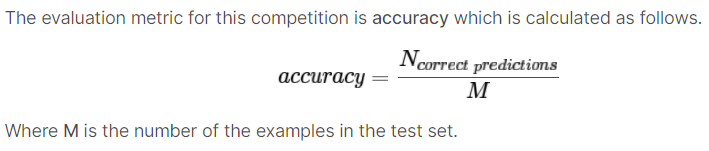

**The accuracy can be defined as the percentage of correctly classified instances (TP + TN)/(TP + TN + FP + FN). where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives, respectively.**


In [26]:
# 1st way to calculate Accuracy 

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

print ( 'Accuracy = ', accuracy)

Accuracy =  1.0


In [27]:
# 2nd way to calculate Accuracy 
# calc Accuracy using confusion_matrix paramaters

cm = confusion_matrix(y_val, y_pred)

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

accuracy(cm)

1.0

In [28]:
# # Classes
# classes  = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])

# figure, ax = plot_confusion_matrix(conf_mat = cm,
#                                    class_names = classes,
#                                    show_absolute = False,
#                                    show_normed = True,
#                                    colorbar = True)

# plt.show()

## Model Prediction 

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 


In [29]:
dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [30]:
# train_cols_list = X_train_no_outliers.columns

In [31]:
# Predicting y of Test data

# Step 1 - applying scalling
# X_test_scaled = scaler.fit_transform(df_test.drop(columns = ['ID']))
# X_test_scaled = pd.DataFrame(X_test_scaled , columns= df_test.columns.difference(['ID']))

# Step 2- removing unimportant features
X_test_scaled = df_test[cols_list]


y_test_predicted = classifier.predict(X_test_scaled)

# add y column to the test data
df_test['y'] = y_test_predicted

df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


# Submission File Generation

In [32]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)